# Advanced Regression Linear example

Prédire le prix de vente d'une voiture comme une fonction des attributs de la voiture par la mise en place et l’exploitation de l’algorithme de régression linéaire. On utilisera aussi des étapes de pré-traitement et sélection appropriée des features et du data

In [1]:
# https://www.dataquest.io/blog/machine-learning-python/
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [41]:
# Charger le dataset automotive
#charger le fichier en remplacant les ? par NA
data = pd.read_csv("imports-85.data", na_values=['?'])
#data represente les données du dataset incluant la cible
print data.shape
#data[:5]
#data.iloc[:5,:10]
data.iloc[:5,10:20]
#data.iloc[:5,20:]
#data.describe()


(205, 26)


,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke
0,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68
1,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68
2,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47
3,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40
4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40


In [39]:
#Affichage des données 
# print data



In [5]:
#Quelques statistiques sur la cible
subset = data.iloc[:,25:26]
print subset.describe()


              price
count    201.000000
mean   13207.129353
std     7947.066342
min     5118.000000
25%     7775.000000
50%    10295.000000
75%    16500.000000
max    45400.000000


In [46]:
#Supprimer la colonne 2  normalized losses
cols =[1,]
subset_1 = data.drop(data.columns[cols], axis=1)
print subset_1.shape
#data.columns[cols] #Index([u'normalized-losses'], dtype='object')

(205, 25)


In [7]:
#print 5 lignes subset_1 en prenant seulement  5 colonnes
print subset_1.iloc[:5,:6]


   symboling         make fuel-type aspiration num-of-doors   body-style
0          3  alfa-romero       gas        std          two  convertible
1          3  alfa-romero       gas        std          two  convertible
2          1  alfa-romero       gas        std          two    hatchback
3          2         audi       gas        std         four        sedan
4          2         audi       gas        std         four        sedan


In [8]:
#Supprimer les lignes avec données incompletes NA ou NaN
subset_2 = subset_1.dropna()
print subset_2.shape


(193, 25)


In [9]:
#Selection des features suivantes
#make, body-style, wheel-base, engine-size, 
#horsepower, peak-rpm, highway-mpg, price 
#drop colonnes autres que ceux qui sont dans le modele ci-dessus   
cols=["symboling", "fuel-type","aspiration",    
"num-of-doors",   
"drive-wheels",   
 "engine-location",     
 "length",  
"width", "height",   
"curb-weight", "engine-type","num-of-cylinders",
"fuel-system", "bore","stroke",  "compression-ratio","city-mpg"] 
 
subset_f = subset_2.drop(cols, axis=1)  
print "Apres selection des features"
print subset_f.shape  


Apres selection des features
(193, 8)


In [10]:
#print 5 rows de subset_6  
print subset_f.iloc[:5,:]


          make   body-style  wheel-base  engine-size  horsepower  peak-rpm  \
0  alfa-romero  convertible        88.6          130       111.0    5000.0   
1  alfa-romero  convertible        88.6          130       111.0    5000.0   
2  alfa-romero    hatchback        94.5          152       154.0    5000.0   
3         audi        sedan        99.8          109       102.0    5500.0   
4         audi        sedan        99.4          136       115.0    5500.0   

   highway-mpg    price  
0           27  13495.0  
1           27  16500.0  
2           26  16500.0  
3           30  13950.0  
4           22  17450.0  


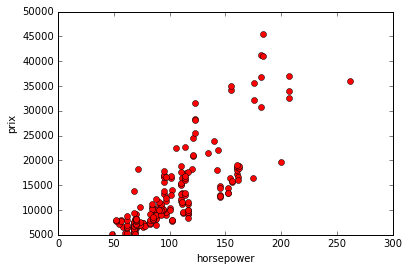

In [11]:
# Plot outputs
import pylab as pl
%matplotlib inline
pl.plot( subset_f.iloc[:,4:5],subset_f.iloc[:,7:8],'ro')
pl.xlabel('horsepower')
pl.ylabel('prix')
pl.show()


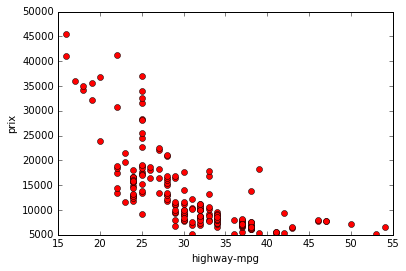

In [12]:
# Plot outputs
import pylab as pl
%matplotlib inline
pl.plot( subset_f.iloc[:,6:7],subset_f.iloc[:,7:8],'ro')
pl.xlabel('highway-mpg')
pl.ylabel('prix')
pl.show()


# test et training data 

In [13]:
# Import de la fonction pour le split 
from sklearn.cross_validation import train_test_split 


In [14]:
# Generer le training set.   
train = subset_f.sample(frac=0.75, random_state=1) 


In [15]:
# Print shapes de l'ensemble de training   
print "shape de training"
print train.shape


shape de training
(145, 8)


In [16]:
# Selectionner le reste pour le test. 
test = subset_f.loc[~subset_f.index.isin(train.index)]
print "shape de test" 
print test.shape


shape de test
(48, 8)


# Training du model 

In [47]:
# Afficher les colonnes predicteurs. 
print train.columns.tolist() 


['make', 'body-style', 'wheel-base', 'engine-size', 'horsepower', 'peak-rpm', 'highway-mpg', 'price']


In [48]:
#Déterminer les ensembles prédicteurs et cible
columns = [ "wheel-base", "engine-size", "horsepower", 
           "peak-rpm", "highway-mpg"] 
target="price"

X_train = train[columns]
Y_train = train[target]

X_test = test[columns]
Y_test = test[target]


In [20]:
#Apprentissage du modele LR
model_lr = LinearRegression()
model_lr.fit(train[columns], train[target])


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [21]:
# Affichage des coefficient
print('Coefficients du modele:', model_lr.coef_)


('Coefficients du modele:', array([ 294.94048473,  109.18720206,   74.73662207,    1.3927916 ,
        138.38019828]))


In [22]:
# Let's see predictions for the first 10 instances
p = model_lr.predict(X_test)
print "Predictions"
print (p[:10])
print "Valeurs vraies"
print Y_test[:10]


Predictions
[ 10310.83324734  11760.14222964  16383.83157862  17388.09323889
   6867.58546464   8759.94605019   6452.44486979   6452.44486979
  12469.15904371   5207.01346378]
Valeurs vraies
1     16500.0
3     13950.0
7     18920.0
8     23875.0
21     5572.0
23     7957.0
25     6692.0
26     7609.0
28     8921.0
32     5399.0
Name: price, dtype: float64


In [23]:
# Vecteur d'erreurs
err = abs(p-Y_test)

In [24]:
# mean square error
print("Residual sum of squares: %.2f"
 % np.sqrt(np.mean(err ** 2)))


Residual sum of squares: 3418.14


In [25]:
from sklearn.metrics import r2_score

print("R2 ou coefficient de determination:%.3f ") % (r2_score(Y_test, p))


R2 ou coefficient de determination:0.780 
